**1. Chargement des données**

In [2]:
import pandas as pd

# Charger le jeu de données
df = pd.read_csv("dataDiabète.csv")

# Aperçu de la structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0            6      148             72             35        0   
1           1            1       85             66             29        0   
2

In [3]:
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63
764,764,2,122,70,27,0,36.8,0.340,27
765,765,5,121,72,23,112,26.2,0.245,30
766,766,1,126,60,0,0,30.1,0.349,47


**2. Analyse exploratoire des données (EDA)**

**2.1 Vérification des dimensions et types**

In [4]:
print("Dimensions :", df.shape)
print("Types de données :", df.dtypes)

Dimensions : (768, 9)
Types de données : Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


**2.2 Valeurs manquantes**

In [5]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


**2.3 Doublons**

In [7]:
print("Nombre de doublons :", df.duplicated().sum())

Nombre de doublons : 0


**2.4 Distribution des variables numériques**

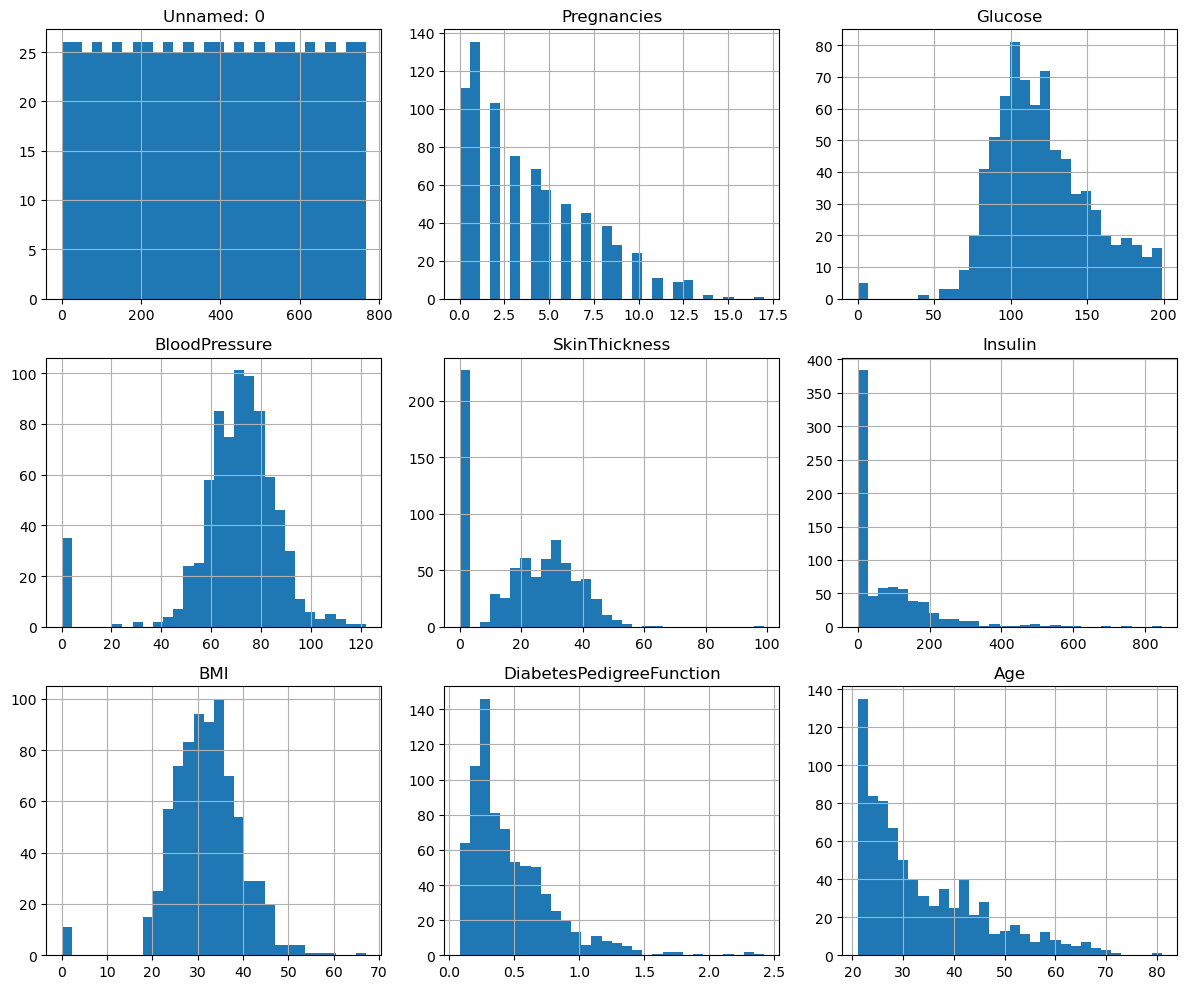

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()


**2.5 Corrélation entre variables**

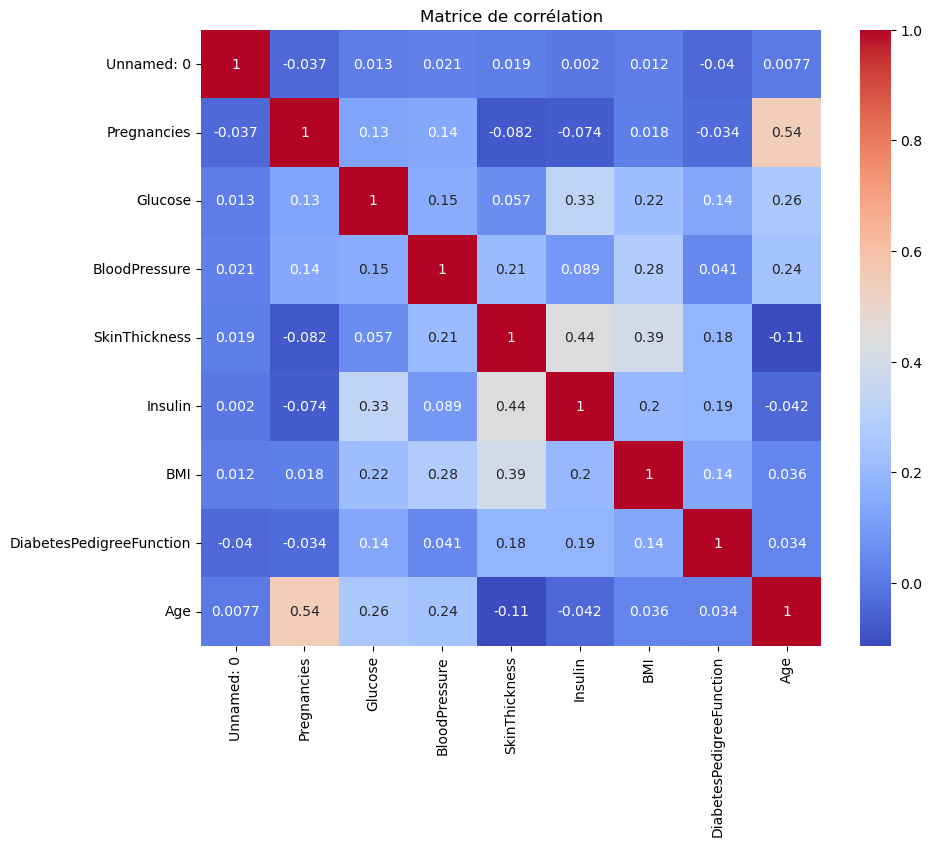

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


**3. Prétraitement des données**

**3.1 Gestion des valeurs manquantes**


**3.2 Détection et suppression des valeurs aberrantes**

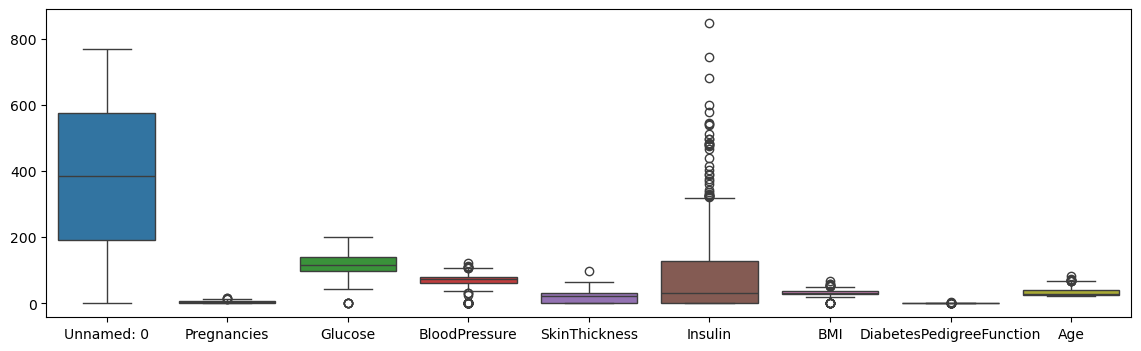

In [11]:
#boîte à moustaches
plt.figure(figsize=(14, 4))
sns.boxplot(df)
plt.show()

In [12]:
#IQR
for colom in df.columns:
    Q1 = df[colom].quantile(0.25)
    Q3 = df[colom].quantile(0.75)
    IQR = Q3 - Q1
    Borne_min = Q1 - 1.5 * IQR
    Borne_max = Q3 + 1.5 * IQR
    df = df[(df[colom] >= Borne_min) & (df[colom] <= Borne_max)]

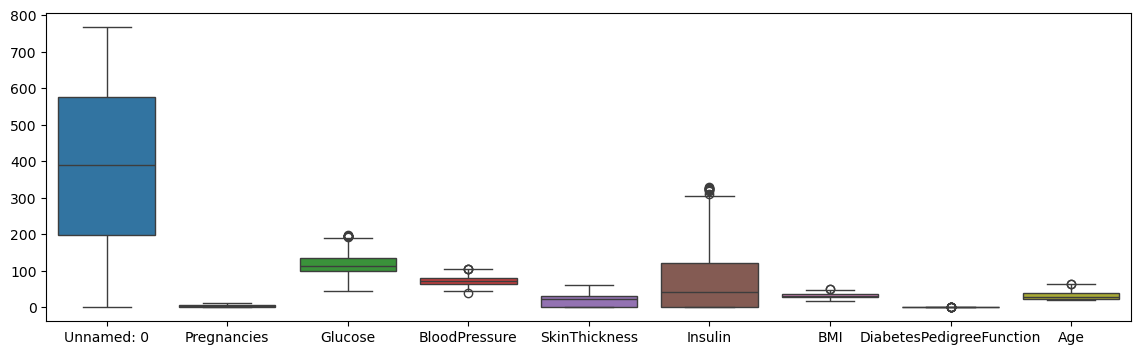

In [13]:
#boîte à moustaches
plt.figure(figsize=(14, 4))
sns.boxplot(df)
plt.show()

**4. Sélection des variables pour le clustering**

In [14]:
features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
df_selected = df[features]

In [15]:
df_selected

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,148,33.6,50,0.627
1,85,26.6,31,0.351
2,183,23.3,32,0.672
3,89,28.1,21,0.167
5,116,25.6,30,0.201
...,...,...,...,...
763,101,32.9,63,0.171
764,122,36.8,27,0.340
765,121,26.2,30,0.245
766,126,30.1,47,0.349


**5. Visualisation des relations entre variables**

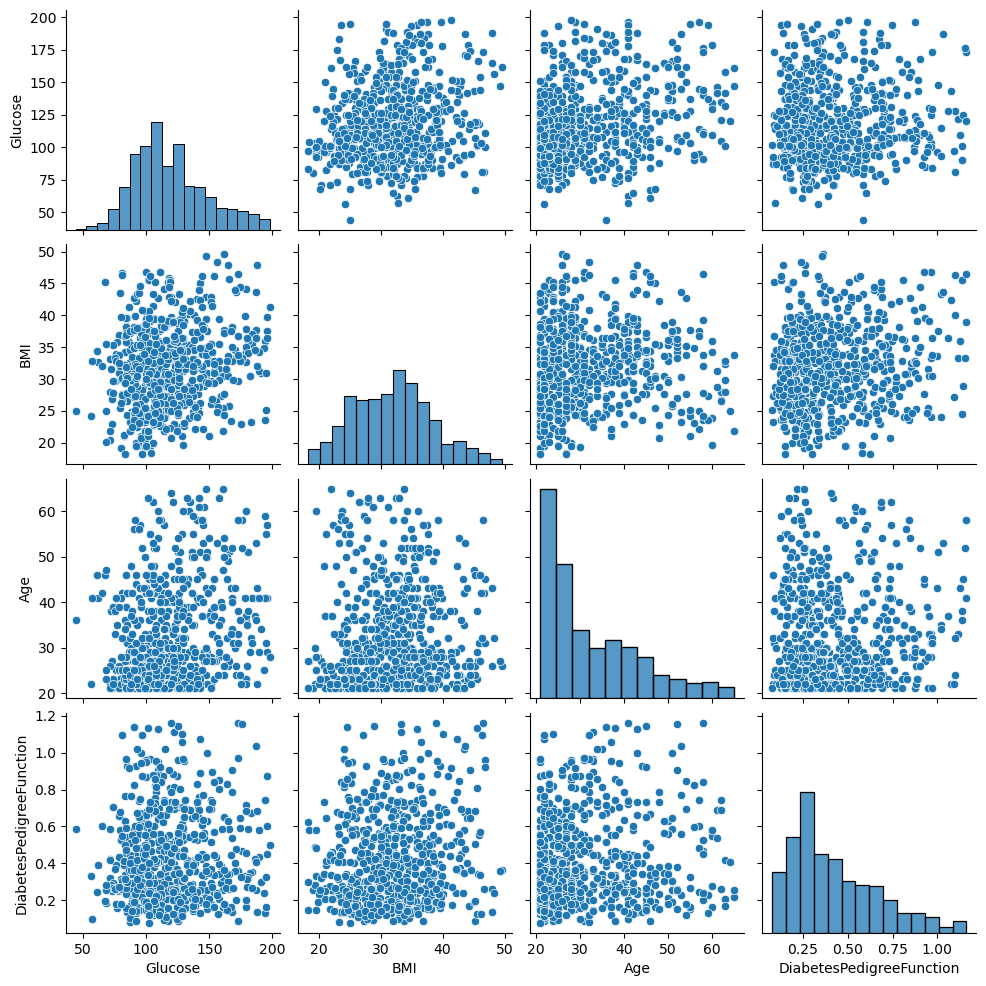

In [16]:
sns.pairplot(df_selected)
plt.show()

**6. Mise à l’échelle des variables**

In [17]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df_selected)
# Facultatif : reconvertir en DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=features)

In [18]:
df_scaled

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,1.005403,0.256438,1.604688,0.819791
1,-1.168963,-0.840893,-0.143041,-0.307223
2,2.213384,-1.358207,-0.051055,1.003543
3,-1.030908,-0.605751,-1.062898,-1.058566
4,-0.099037,-0.997655,-0.235026,-0.919731
...,...,...,...,...
631,-0.616743,0.146705,2.800503,-1.042232
632,0.108045,0.758076,-0.510984,-0.352141
633,0.073532,-0.903598,-0.235026,-0.740062
634,0.246100,-0.292227,1.328731,-0.315390


**6. clustering K-Means**

In [19]:
from sklearn.cluster import KMeans

**6. Détermination de la valeur optimale de k (méthode du coude)**

In [20]:
inertias = []  # liste pour stocker l'inertie pour chaque k

k_range = range(1, 11)  # on teste les valeurs de k de 1 à 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)  # inertie = somme des distances intra-cluster

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

**6.2 Tracer la courbe du coude**

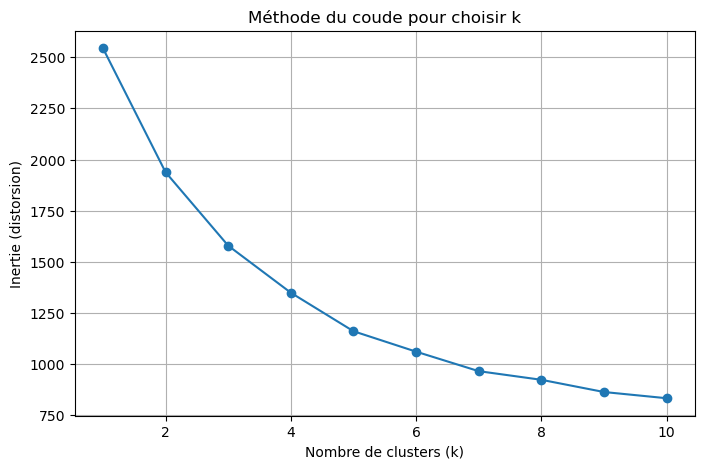

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Méthode du coude pour choisir k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (distorsion)")
plt.grid(True)
plt.show()

**6.3 Entraînement du modèle K-Means avec le k optimal**

In [23]:
k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


**6.4 Ajouter une colonne Cluster au dataset original**

In [35]:
df['Cluster'] = clusters

**6.5 Visualiser la répartition des observations par cluster**

In [36]:
print(df['Cluster'].value_counts())

Cluster
1    383
0    253
Name: count, dtype: int64


**7 Réduction de dimensionnalité pour visualisation**

**7.1 Appliquer l’ACP (PCA) pour réduire les dimensions à 2 axes.**

In [41]:
print(df_scaled.columns)
df_scaled.head()

Index(['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction'], dtype='object')


,Glucose,BMI,Age,DiabetesPedigreeFunction
0,1.005403,0.256438,1.604688,0.819791
1,-1.168963,-0.840893,-0.143041,-0.307223
2,2.213384,-1.358207,-0.051055,1.003543
3,-1.030908,-0.605751,-1.062898,-1.058566
4,-0.099037,-0.997655,-0.235026,-0.919731


In [47]:
from sklearn.decomposition import PCA

# Appliquer PCA pour réduire les dimensions à 2 axes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Créer un DataFrame pour les composants principaux
df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

# Ajouter la colonne 'Cluster' au DataFrame PCA pour la visualisation
# Nous devons utiliser l'index de df, qui contient déjà la colonne 'Cluster'
df_pca['Cluster'] = df['Cluster'].reset_index(drop=True)

print("\nDataFrame PCA avec les deux premières composantes principales et les clusters :")
print(df_pca.head())

print(f"\nVariance expliquée par les deux premières composantes principales : {pca.explained_variance_ratio_.sum()*100:.2f}%")


DataFrame PCA avec les deux premières composantes principales et les clusters :
        PC1       PC2  Cluster
0  1.839580 -0.369366        0
1 -1.315408 -0.186254        1
2  0.984952 -0.441877        0
3 -1.818953 -0.207224        1
4 -0.958132 -0.934887        1

Variance expliquée par les deux premières composantes principales : 61.27%


**7.2 Réentraîner le modèle K-Means sur les nouvelles dimensions**

In [50]:
# Réentraîner K-Means sur les données PCA pour la visualisation
kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_pca.fit(df_pca[['PC1', 'PC2']])

# Ajouter les nouveaux labels de cluster basés sur PCA au DataFrame PCA
df_pca['Cluster_PCA'] = kmeans_pca.labels_

print(f"\nModèle K-Means réentraîné sur les données PCA avec {2} clusters.")
print("Aperçu du DataFrame PCA avec les clusters recalculés :")
print(df_pca.head())


Modèle K-Means réentraîné sur les données PCA avec 2 clusters.
Aperçu du DataFrame PCA avec les clusters recalculés :
        PC1       PC2  Cluster  Cluster_PCA
0  1.839580 -0.369366        0            0
1 -1.315408 -0.186254        1            1
2  0.984952 -0.441877        0            0
3 -1.818953 -0.207224        1            1
4 -0.958132 -0.934887        1            1


c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


**7.3 Visualiser les clusters obtenus et analyser la distribution**

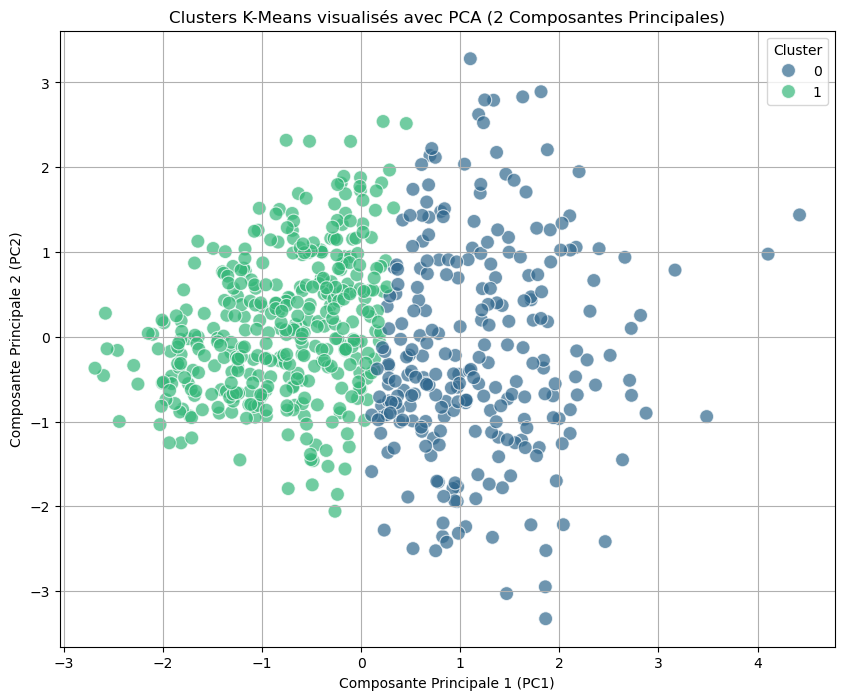


Le graphique ci-dessus montre la distribution des clusters dans l'espace PCA en 2D.


In [51]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_PCA', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters K-Means visualisés avec PCA (2 Composantes Principales)')
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("\nLe graphique ci-dessus montre la distribution des clusters dans l'espace PCA en 2D.")